In [1]:
#Q1:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)
accuracy = model.score(X_test, y_test)
print(f"Model accuracy on test set: {accuracy * 100:.2f}%")


Model accuracy on test set: 96.67%


In [2]:
#Q2:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
iris = load_iris()
X = iris.data
y = iris.target
X = X[y != 2]
y = y[y != 2]
X = X / X.max()
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
model = LogisticRegression(
    penalty='l1',
    solver='liblinear',
    C=1.0,
    max_iter=1000
)
model.fit(X_train, y_train)
accuracy = model.score(X_test, y_test)
print(f"Model accuracy on test set: {accuracy * 100:.2f}%")


Model accuracy on test set: 100.00%


In [3]:
#Q3:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = LogisticRegression(
    penalty='l2',
    solver='lbfgs',
    C=1.0,
    max_iter=1000
)
model.fit(X_train_scaled, y_train)
accuracy = model.score(X_test_scaled, y_test)
print(f"Model accuracy on test set: {accuracy * 100:.2f}%\n")
print("Model coefficients (weights):")
for idx, class_label in enumerate(iris.target_names):
    print(f"Class '{class_label}': {model.coef_[idx]}")


Model accuracy on test set: 93.33%

Model coefficients (weights):
Class 'setosa': [-1.08894494  1.02420763 -1.79905609 -1.68622819]
Class 'versicolor': [ 0.53633654 -0.36048698 -0.20407418 -0.80795703]
Class 'virginica': [ 0.5526084  -0.66372065  2.00313027  2.49418523]


In [4]:
#Q4:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
iris = load_iris()
X = iris.data
y = iris.target
X = X[y != 2]
y = y[y != 2]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)
model = LogisticRegression(
    penalty='elasticnet',
    solver='saga',       # 'saga' solver supports Elastic Net penalty
    l1_ratio=0.5,        # Mix ratio: 0.5 gives equal weight to L1 and L2 penalties
    C=1.0,               # Inverse of regularization strength; smaller values specify stronger regularization
    max_iter=1000,       # Increase if the model doesn't converge
    random_state=42
)
model.fit(X_train, y_train)
accuracy = model.score(X_test, y_test)
print(f"Model accuracy on test set: {accuracy * 100:.2f}%\n")
print("Model coefficients (weights):")
print(model.coef_)


Model accuracy on test set: 100.00%

Model coefficients (weights):
[[ 0.67624741 -0.94803463  1.62553317  1.59807877]]


In [5]:
#Q5:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
iris = load_iris()
X = iris.data
y = iris.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

model = LogisticRegression(
    multi_class='ovr',
    solver='lbfgs',
    C=1.0,
    max_iter=1000,
    random_state=42
)

model.fit(X_train, y_train)

accuracy = model.score(X_test, y_test)

print(f"Model accuracy on test set: {accuracy * 100:.2f}%\n")

print("Model coefficients (weights):")
for idx, class_label in enumerate(iris.target_names):
    print(f"Class '{class_label}': {model.coef_[idx]}")


Model accuracy on test set: 90.00%

Model coefficients (weights):
Class 'setosa': [-1.08529964  1.11580744 -1.6807171  -1.54388619]
Class 'versicolor': [ 0.06528908 -1.23828607  0.85218986 -0.90713365]
Class 'virginica': [ 0.23356174 -0.38774568  2.15373535  2.94516348]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [6]:
#Q6:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import warnings

iris = load_iris()
X = iris.data
y = iris.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']  # 'liblinear' supports both 'l1' and 'l2' penalties
}

logistic = LogisticRegression(max_iter=1000)

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=UserWarning)

    grid_search = GridSearchCV(logistic, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Best Hyperparameters: {best_params}")
print(f"Accuracy on test set: {accuracy:.2f}")


Best Hyperparameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy on test set: 0.93


In [7]:
#Q7:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler

iris = load_iris()
X = iris.data
y = iris.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

n_splits = 5  # Number of folds
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
model = LogisticRegression(max_iter=1000, random_state=42)

accuracies = cross_val_score(model, X_scaled, y, cv=skf, scoring='accuracy')

for i, accuracy in enumerate(accuracies, 1):
    print(f"Fold {i} Accuracy: {accuracy:.4f}")
print(f"\nAverage Accuracy: {np.mean(accuracies):.4f}")


Fold 1 Accuracy: 1.0000
Fold 2 Accuracy: 0.9667
Fold 3 Accuracy: 0.9000
Fold 4 Accuracy: 1.0000
Fold 5 Accuracy: 0.9000

Average Accuracy: 0.9533


In [ ]:
#Q8:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('your_dataset.csv')
X = df.drop('target_column', axis=1)
y = df['target_column']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")


In [9]:
#Q9:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from scipy.stats import loguniform

iris = load_iris()
X = iris.data
y = iris.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

param_distributions = {
    'C': loguniform(1e-4, 1e4),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}


model = LogisticRegression(max_iter=1000, random_state=42)


random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_distributions,
    n_iter=50,
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)
random_search.fit(X_train, y_train)
best_params = random_search.best_params_
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Best Hyperparameters: {best_params}")
print(f"Accuracy on test set: {accuracy:.4f}")


Best Hyperparameters: {'C': np.float64(456.6054873446131), 'penalty': 'l2', 'solver': 'saga'}
Accuracy on test set: 1.0000


In [10]:
#Q10:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


iris = load_iris()
X = iris.data
y = iris.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


base_model = LogisticRegression(solver='liblinear', max_iter=1000, random_state=42)
ovo_model = OneVsOneClassifier(base_model)

ovo_model.fit(X_train, y_train)
y_pred = ovo_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"One-vs-One Logistic Regression Accuracy: {accuracy:.4f}")


One-vs-One Logistic Regression Accuracy: 0.9333


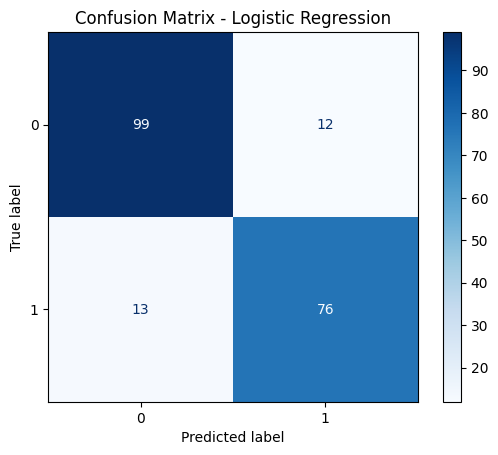

In [11]:
#Q11:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

X, y = make_classification(n_samples=1000, n_features=20, n_informative=2,
                           n_redundant=10, n_classes=2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Logistic Regression')
plt.show()


In [12]:
#Q12:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler


X, y = make_classification(n_samples=1000, n_features=20, n_informative=2,
                           n_redundant=10, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Precision: 0.8636
Recall: 0.8539
F1-Score: 0.8588

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.89      0.89       111
           1       0.86      0.85      0.86        89

    accuracy                           0.88       200
   macro avg       0.87      0.87      0.87       200
weighted avg       0.87      0.88      0.87       200



Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.84      0.91       189
           1       0.24      0.91      0.38        11

    accuracy                           0.84       200
   macro avg       0.62      0.87      0.65       200
weighted avg       0.95      0.84      0.88       200



RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

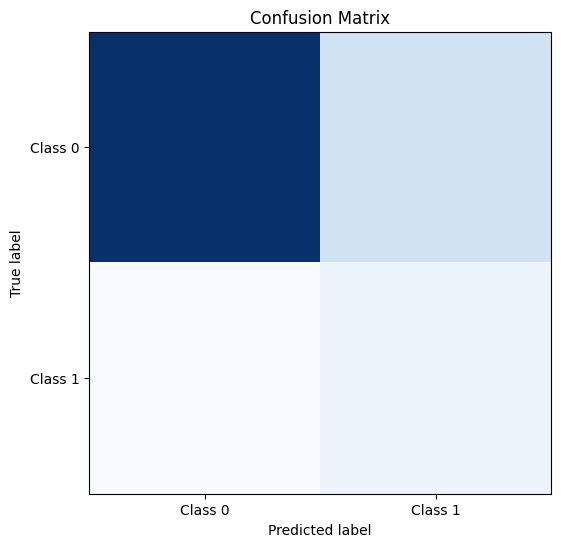

In [13]:
#Q13:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2,
                           n_redundant=10, n_classes=2, weights=[0.95, 0.05], flip_y=0,
                           random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

print("Classification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.set_title('Confusion Matrix')
ax.set_xticks(np.arange(cm.shape[1]))
ax.set_yticks(np.arange(cm.shape[0]))
ax.set_xticklabels(['Class 0', 'Class 1'])
ax.set_yticklabels(['Class 0', 'Class 1'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.colorbar()
plt.show()


In [14]:
#Q14:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer


url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
target = 'Survived'
X = df[features]
y = df[target]
numerical_cols = ['Age', 'Fare']
numerical_imputer = SimpleImputer(strategy='median')
X[numerical_cols] = numerical_imputer.fit_transform(X[numerical_cols])
categorical_cols = ['Embarked']
categorical_imputer = SimpleImputer(strategy='most_frequent')
X[categorical_cols] = categorical_imputer.fit_transform(X[categorical_cols])
X = pd.get_dummies(X, drop_first=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.8100558659217877

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



<ipython-input-14-ea3ee6aa6622>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[numerical_cols] = numerical_imputer.fit_transform(X[numerical_cols])
<ipython-input-14-ea3ee6aa6622>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[categorical_cols] = categorical_imputer.fit_transform(X[categorical_cols])


In [15]:
#Q15:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

X, y = make_classification(n_samples=1000, n_features=20, n_informative=2,
                           n_redundant=10, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000, random_state=42)

model.fit(X_train, y_train)
y_pred_no_scaling = model.predict(X_test)
accuracy_no_scaling = accuracy_score(y_test, y_pred_no_scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model.fit(X_train_scaled, y_train)
y_pred_scaled = model.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
print(f'Accuracy without scaling: {accuracy_no_scaling:.4f}')
print(f'Accuracy with scaling: {accuracy_scaled:.4f}')


Accuracy without scaling: 0.8750
Accuracy with scaling: 0.8750


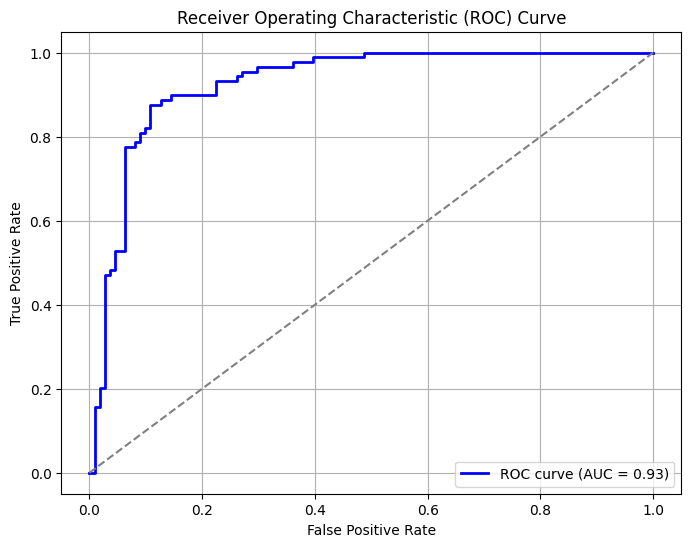

ROC-AUC Score: 0.9284


In [16]:
#Q16:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2,
                           n_redundant=10, n_classes=2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
print(f'ROC-AUC Score: {roc_auc:.4f}')


In [17]:
#Q17:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = make_classification(n_samples=1000, n_features=20, n_informative=2,
                           n_redundant=10, n_classes=2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(C=0.5, max_iter=1000, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy with C=0.5: {accuracy:.4f}')


Accuracy with C=0.5: 0.8750


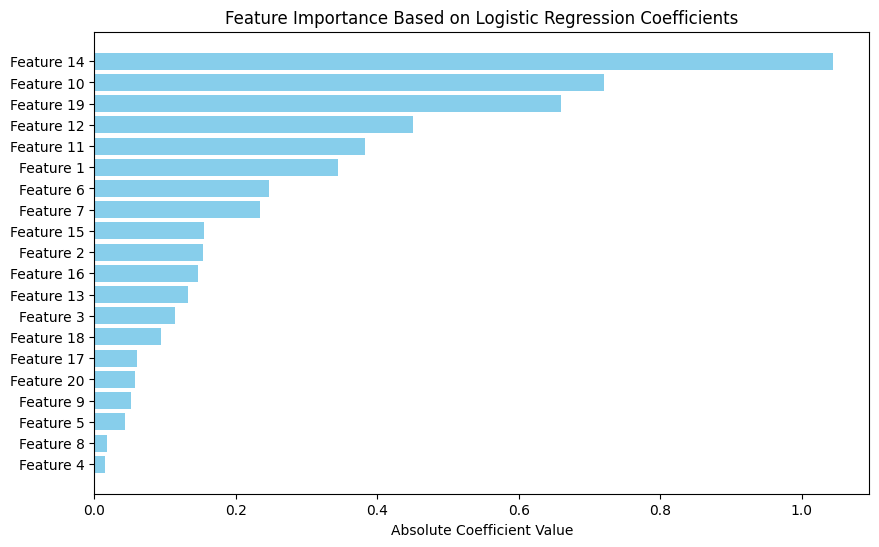

Top 5 Most Important Features:
       Feature  Coefficient  Abs_Coefficient
13  Feature 14    -1.043590         1.043590
9   Feature 10    -0.720202         0.720202
18  Feature 19     0.659451         0.659451
11  Feature 12    -0.450157         0.450157
10  Feature 11     0.381820         0.381820


In [18]:
#Q18:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X, y = make_classification(n_samples=1000, n_features=20, n_informative=5,
                           n_redundant=5, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)
coefficients = model.coef_[0]
feature_names = [f'Feature {i+1}' for i in range(X_train.shape[1])]
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Abs_Coefficient': np.abs(coefficients)
})
feature_importance = feature_importance.sort_values(by='Abs_Coefficient', ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Abs_Coefficient'], color='skyblue')
plt.xlabel('Absolute Coefficient Value')
plt.title('Feature Importance Based on Logistic Regression Coefficients')
plt.gca().invert_yaxis()
plt.show()
print("Top 5 Most Important Features:")
print(feature_importance.head())


In [19]:
#Q19:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2,
                           n_redundant=10, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
kappa = cohen_kappa_score(y_test, y_pred)
print(f"Cohen's Kappa Score: {kappa:.4f}")


Cohen's Kappa Score: 0.7467


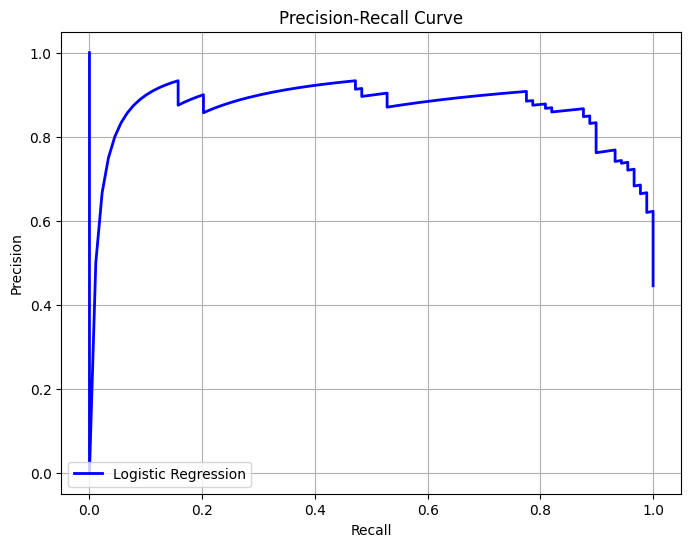

In [20]:
#Q20:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay

X, y = make_classification(n_samples=1000, n_features=20, n_informative=2,
                           n_redundant=10, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)
y_prob = model.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b', lw=2, label='Logistic Regression')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()


Accuracy with solver 'liblinear': 0.8750
Accuracy with solver 'saga': 0.8750
Accuracy with solver 'lbfgs': 0.8750


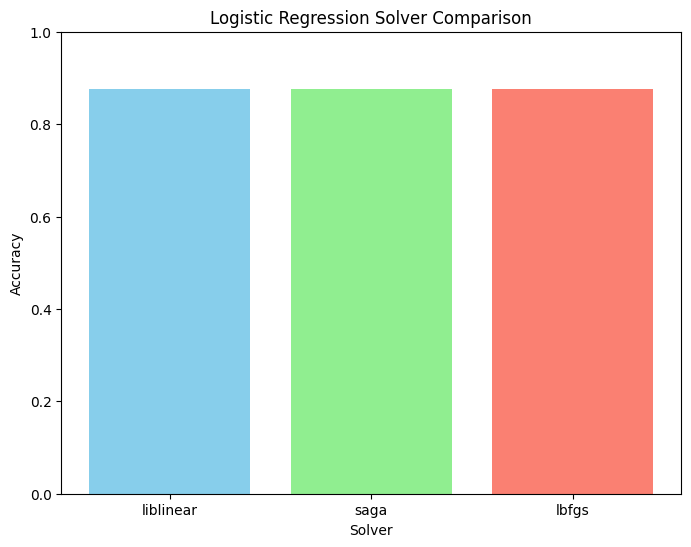

In [21]:
#Q21:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = make_classification(n_samples=1000, n_features=20, n_informative=2,
                           n_redundant=10, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
solvers = ['liblinear', 'saga', 'lbfgs']
accuracies = []


for solver in solvers:
    model = LogisticRegression(solver=solver, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"Accuracy with solver '{solver}': {accuracy:.4f}")


plt.figure(figsize=(8, 6))
plt.bar(solvers, accuracies, color=['skyblue', 'lightgreen', 'salmon'])
plt.xlabel('Solver')
plt.ylabel('Accuracy')
plt.title('Logistic Regression Solver Comparison')
plt.ylim(0, 1)
plt.show()


In [22]:
#Q22:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import matthews_corrcoef

X, y = make_classification(n_samples=1000, n_features=20, n_informative=2,
                           n_redundant=10, n_classes=2, random_state=42)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mcc = matthews_corrcoef(y_test, y_pred)
print(f"Matthews Correlation Coefficient: {mcc:.4f}")


Matthews Correlation Coefficient: 0.7467


Accuracy on raw data: 0.8750
Accuracy on standardized data: 0.8750


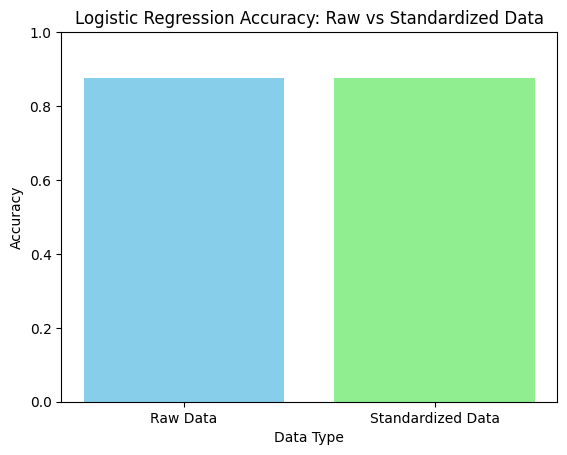

In [23]:
#Q23:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

X, y = make_classification(n_samples=1000, n_features=20, n_informative=2,
                           n_redundant=10, n_classes=2, random_state=42)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)
y_pred_raw = model.predict(X_test)
accuracy_raw = accuracy_score(y_test, y_pred_raw)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model.fit(X_train_scaled, y_train)
y_pred_scaled = model.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)

print(f'Accuracy on raw data: {accuracy_raw:.4f}')
print(f'Accuracy on standardized data: {accuracy_scaled:.4f}')

labels = ['Raw Data', 'Standardized Data']
accuracies = [accuracy_raw, accuracy_scaled]
plt.bar(labels, accuracies, color=['skyblue', 'lightgreen'])
plt.xlabel('Data Type')
plt.ylabel('Accuracy')
plt.title('Logistic Regression Accuracy: Raw vs Standardized Data')
plt.ylim(0, 1)
plt.show()


Optimal C (Regularization Strength): 0.0001
Test Set Accuracy: 0.8750


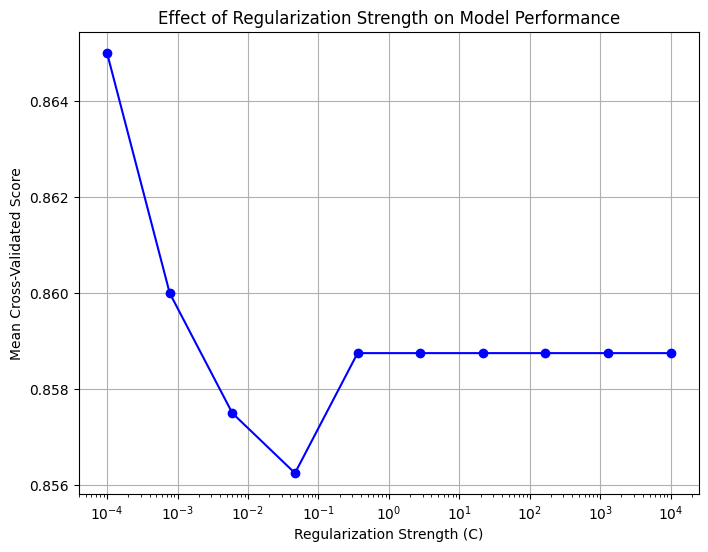

In [24]:
#Q24:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2,
                           n_redundant=10, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegressionCV(cv=5, max_iter=1000, random_state=42)
model.fit(X_train, y_train)
optimal_C = model.C_[0]
print(f"Optimal C (Regularization Strength): {optimal_C:.4f}")
accuracy = model.score(X_test, y_test)
print(f"Test Set Accuracy: {accuracy:.4f}")
mean_scores = np.mean(model.scores_[1], axis=0)
plt.figure(figsize=(8, 6))
plt.plot(model.Cs_, mean_scores, marker='o', linestyle='-', color='b')
plt.xscale('log')
plt.xlabel('Regularization Strength (C)')
plt.ylabel('Mean Cross-Validated Score')
plt.title('Effect of Regularization Strength on Model Performance')
plt.grid(True)
plt.show()



In [25]:
#Q25:
import numpy as np
import joblib
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2,
                           n_redundant=10, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)
joblib.dump(model, 'logistic_regression_model.pkl')
loaded_model = joblib.load('logistic_regression_model.pkl')
y_pred = loaded_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy: {accuracy:.4f}")


Test Set Accuracy: 0.8750
